In [96]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [87]:
# Read in data
data_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

colon_dataset = datasets.ImageFolder(root='lung_colon_image_set/colon_image_sets', transform=data_transformation)
lung_dataset = datasets.ImageFolder(root='lung_colon_image_set/lung_image_sets', transform=data_transformation)
dataset = torch.utils.data.ConcatDataset([colon_dataset, lung_dataset])



In [91]:
# Set up train and test data
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

batch_size = 32  
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [94]:
colon_labels = colon_dataset.class_to_idx
lung_labels = {class_name: class_idx + len(colon_labels) for class_name, class_idx in lung_dataset.class_to_idx.items()}
labels = {**colon_labels, **lung_labels}

In [95]:
labels

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

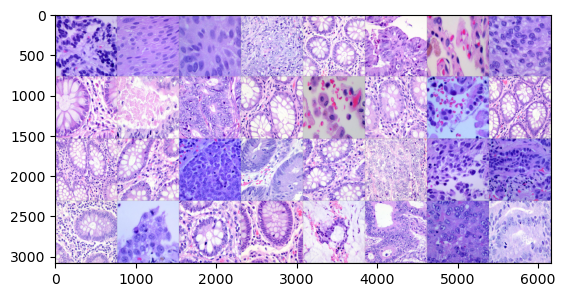

In [114]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(train_loader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [116]:
labels

tensor([0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 2, 0])

In [92]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU. If 'cuda:0' is printed, it means GPU is available.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  


cpu
